# Notebook to Visualize Positions of Egyptian Decans with decanOpy

Everything is better with Python. 

In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os 

## Analysis Functions

In [7]:
# Import Decan Data

def ImportDecanData(direct, filename):
    
    '''
    A function to import data from a decanOpy-generated .txt file. 
    Inputs: 
        direct = string with the directory where the .txt file is located
        filename = string with name of file (name + month + year)
    Outputs:
        jd = Julian date
        date = human readable date
        DecAz = the azimuth of the decan
        DecAlt = the altitude of the decan
        SunAz = the azimuth of the Sun
        SunAlt = the altitude of the Sun
    '''
    
    jd = []
    date = []
    DecAz = []
    DecAlt = []
    SunAz = []
    SunAlt = []
    # Import Single Object
    with open(direct + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='|')
        decan = next(csv_reader)[0]
        location = next(csv_reader)[0]
        trash = next(csv_reader)
        headers = next(csv_reader)
        for row in csv_reader:
            # time info
            jd.append(float(row[0]))
            date.append(row[1])
            # decan info
            DecAz.append(float(row[2][0:-4]))
            DecAlt.append(float(row[3][0:-4]))
            # solar info
            SunAz.append(float(row[4][0:-4]))
            SunAlt.append(float(row[5][0:-4]))
    return(jd, date, DecAz, DecAlt, SunAz, SunAlt)

def JustDecanData(direct, filename):
    
    '''
    A function to import just the can data data from a decanOpy-generated .txt file. 
    Used for the MaxMinAltAz function.
    Inputs: 
        direct = string with the directory where the .txt file is located
        filename = string with name of file (name + month + year)
    Outputs:
        DecAz = the azimuth of the decan
        DecAlt = the altitude of the decan
    '''
    
    DecAz = []
    DecAlt = []
    # Import Single Object
    with open(direct + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='|')
        decan = next(csv_reader)[0]
        location = next(csv_reader)[0]
        trash = next(csv_reader)
        headers = next(csv_reader)
        for row in csv_reader:
            # decan info
            DecAz.append(float(row[2][0:-4]))
            DecAlt.append(float(row[3][0:-4]))
            # solar info
    return(DecAz, DecAlt)

# Get Sunset and Sunrise Times

def SunRiseSet(jd, SunAlt):
    
    '''
    A function to create a list of indices where the Sun rises and sets in a given year. 
    This is useful for making sure we're tracking nightly, visible motion of the decans.
    Inputs: 
        jd = Julian date
        SunAlt = the altitude of the Sun
    Outputs:
        sunriseset = indices of sunrize and sunset in the jd & date columns
    '''
    
    sunriseset = []
    for i in range(360, len(jd), 360):
        temp = []
        for j in range(i - 360, i):
            if SunAlt[j] <= 0.4 and SunAlt[j] >= -0.4:
                if len(temp) == 0: 
                    temp.append(j)
                elif temp[-1] != j - 1:
                    temp.append(j)
        sunriseset.append(temp)
    return sunriseset

# Maximum and Minimum Nightly Altitude of Object

def MaxMinAltAz(direct, filename, jd, sunriseset):
    
    '''
    A function to create lists of minimum and maximum azimuths and altitudes of the decan. 
    This is useful for making sure we're tracking nightly, visible motion of the decans.
    Inputs: 
        direct = string with the directory where the .txt file is located
        filename = string with name of file (name + month + year)
        jv = Julian date
        sunriseset = indices of sunrize and sunset in the jd & date columns
    Outputs:
        sunriseset = indices of sunrize and sunset in the jd & date columns
        days = list of indices when it's daylight 
        minaz, maxaz = minimum and maximum azimuths of the decan per night
        minalt, maxalt = minimum and maximum altitudes of the decan per night
        riseaz, setaz = azimuth of decan at rise & set
        risealt, setalt = altitude of decan at rise & set
    '''
    
    (DecAz, DecAlt) = JustDecanData(direct, filename)
    maxalt = []
    minalt = []
    maxaz = []
    minaz = []
    riseaz = []
    setaz = []
    risealt = []
    setalt = []
    days = []
    for i in range(0, int(len(jd)/360) - 2):
        sset = sunriseset[i][1]
        srise = sunriseset[i + 1][0]
        maxalt.append(max(DecAlt[sset:srise]))
        minalt.append(min(DecAlt[sset:srise]))
        maxaz.append(max(DecAz[sset:srise]))
        minaz.append(min(DecAz[sset:srise]))
        riseaz.append(DecAz[srise])
        setaz.append(DecAz[sset])
        risealt.append(DecAlt[srise])
        setalt.append(DecAlt[sset])
        days.append(DecAlt[srise:sset])
    return(days, minaz, maxaz, minalt, maxalt, riseaz, setaz, risealt, setalt)
                        


## Example of Data Processing

In [12]:
### Set the directory

direct = os.getcwd() # current working directory
direct = direct + '/DecanLists' # directory where the .txt files go

### Determine the filenames

Sirius_filename = ['/Sirius011300BC.txt']
Orion_filename = ['/Rigel011300BC.txt', '/Betelgeuse011300BC.txt']
Dipper_filename = ['/Alkaid011300BC.txt', '/Alioth011300BC.txt', '/Merak011300BC.txt']

### Import sun + decan data

# Sirius
(jd, date, SiriusAz, SiriusAlt, SunAz, SunAlt) = ImportDecanData(direct, Sirius_filename[0])
# Orion
(RigelAz, RigelAlt) = JustDecanData(direct, Orion_filename[0])
(BetAz, BetAlt) = JustDecanData(direct, Orion_filename[1])
# Big Dipper
(AlkaidAz, AlkaidAlt) = JustDecanData(direct, Dipper_filename[0])
(AliothAz, AliothAlt) = JustDecanData(direct, Dipper_filename[1])
(MerakAz, MerakAlt) = JustDecanData(direct, Dipper_filename[2])


### Sunrise & Sunset Times
sunriseset = SunRiseSet(jd, SunAlt)


### Calculate maximum and minimum altitudes 

# Sirius
(days, SirMinAz, SirMaxAz, SirMinAz, SirMaxAlt, SirRiseAz, SirSetAz, SirRiseAlt, SirSetAlt) = MaxMinAltAz(direct, Sirius_filename[0], jd, sunriseset)
# Orion
(days, RigMinAz, RigMaxAz, RigMinAz, RigMaxAlt, RigRiseAz, RigSetAz,  RigRiseAlt, RigSetAlt) = MaxMinAltAz(direct, Orion_filename[0], jd, sunriseset)
(days, BetMinAz, BetMaxAz, BetMinAz, BetMaxAlt, BetRiseAz, BetSetAz,  BetRiseAlt, BetSetAlt) = MaxMinAltAz(direct, Orion_filename[1], jd, sunriseset)
# Big Dipper
(days, AlkMinAz, AlkMaxAz, AlkMinAz, AlkMaxAlt, AlkRiseAz, AlkSetAz, AlkRiseAlt, AlkSetAlt) = MaxMinAltAz(direct, Dipper_filename[0], jd, sunriseset)
(days, AliMinAz, AliMaxAz, AliMinAz, AliMaxAlt, AliRiseAz, AliSetAz, AliRiseAlt, AliSetAlt) = MaxMinAltAz(direct, Dipper_filename[1], jd, sunriseset)
(days, MerMinAz, MerMaxAz, MerMinAz, MerMaxAlt, MerRiseAz, MerSetAz, MerRiseAlt, MerSetAlt) = MaxMinAltAz(direct, Dipper_filename[2], jd, sunriseset)



## Plotting Examples

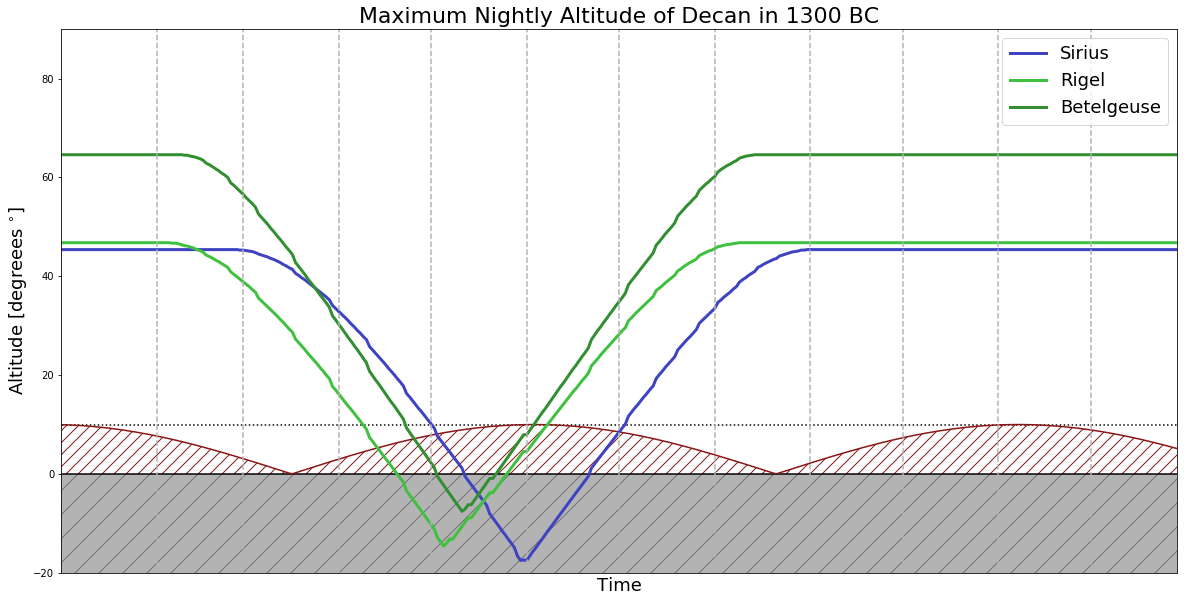

In [13]:
plt.figure(figsize=(20,10))

plt.hlines(0, 0, 366)
plt.hlines(10, 0, 366, linestyle = ':')

xdays = np.arange(1, len(SirMaxAlt)+1)
y1 = np.abs(10 * np.sin(0.02 * xdays + 29.9))

# this makes the "mountain" effect
plt.plot(xdays, y1, color="#891515")
plt.fill_between(xdays, 0, y1,  facecolor="none", hatch="//", edgecolor="#891515", linewidth=0.0)
plt.fill_between(xdays, -30, 0, facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)

plt.plot(xdays, SirMaxAlt,  linewidth=3.0, color = '#3F43C1', label = 'Sirius')

plt.plot(xdays, RigMaxAlt,  linewidth=3.0, color = '#3FC13F', label = 'Rigel')
plt.plot(xdays, BetMaxAlt,  linewidth=3.0, color = '#318F31', label = 'Betelgeuse')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Maximum Nightly Altitude of Decan in 1300 BC', fontsize=22)    
plt.ylabel(r'Altitude [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(-20, 90)
plt.legend(fontsize = 18)
plt.show()

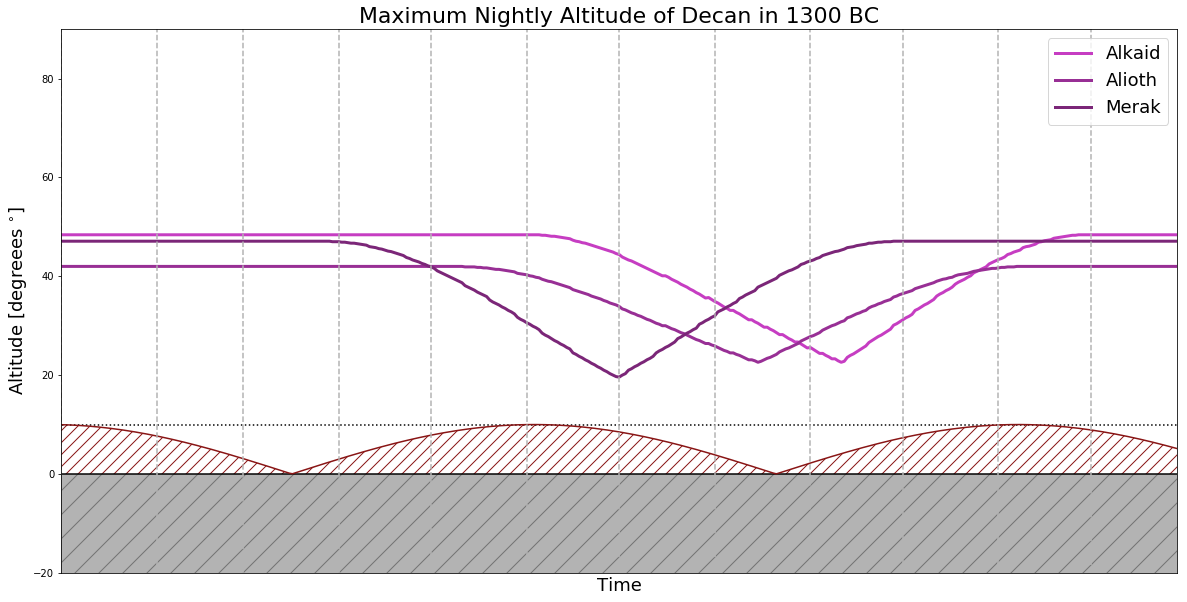

In [17]:
plt.figure(figsize=(20,10))

plt.hlines(0, 0, 366)
plt.hlines(10, 0, 366, linestyle = ':')

xdays = np.arange(1, len(SirMaxAlt)+1)
y1 = np.abs(10 * np.sin(0.02 * xdays + 29.9))

# this makes the "mountain" effect
plt.plot(xdays, y1, color="#891515")
plt.fill_between(xdays, 0, y1,  facecolor="none", hatch="//", edgecolor="#891515", linewidth=0.0)
plt.fill_between(xdays, -30, 0, facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)

# this plots the data
plt.plot(xdays, AlkMaxAlt,  linewidth=3.0, color = '#C63DC2', label = 'Alkaid')
plt.plot(xdays, AliMaxAlt,  linewidth=3.0, color = '#982F95',  label = 'Alioth')
plt.plot(xdays, MerMaxAlt,  linewidth=3.0, color = '#7B2678',  label = 'Merak')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Maximum Nightly Altitude of Decan in 1300 BC', fontsize=22)    
plt.ylabel(r'Altitude [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(-20, 90)
plt.legend(fontsize = 18)
plt.show()

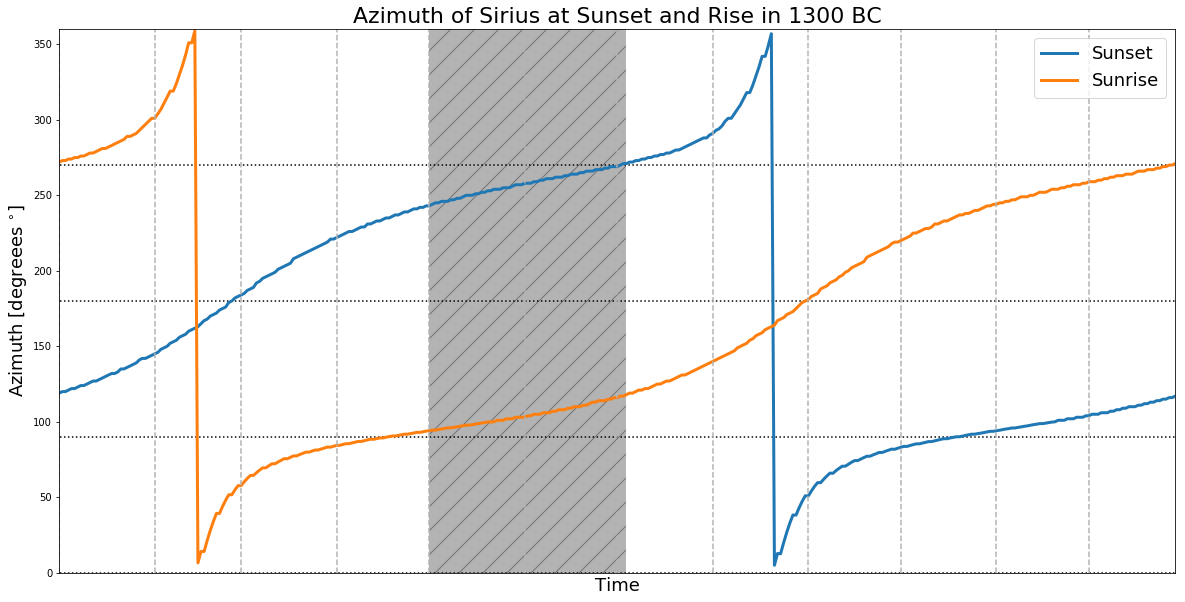

In [15]:
plt.figure(figsize=(20,10))

plt.plot(xdays, SirSetAz,  linewidth=3.0, label = 'Sunset')
plt.plot(xdays, SirRiseAz,  linewidth=3.0, label = 'Sunrise')


# NESW LINES
ycoords = np.cumsum([-360, 90, 90, 90, 90, 90, 90, 90])
for yc in ycoords:
    plt.hlines(yc, 0, 366, linestyle = ':')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )

plt.fill_between(xdays[120 : 130 + 54 + 1], -360, 360,  facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)    
    
    
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Azimuth of Sirius at Sunset and Rise in 1300 BC', fontsize=22)    
plt.ylabel(r'Azimuth [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(0, 360)
plt.legend(fontsize = 18)
plt.show()

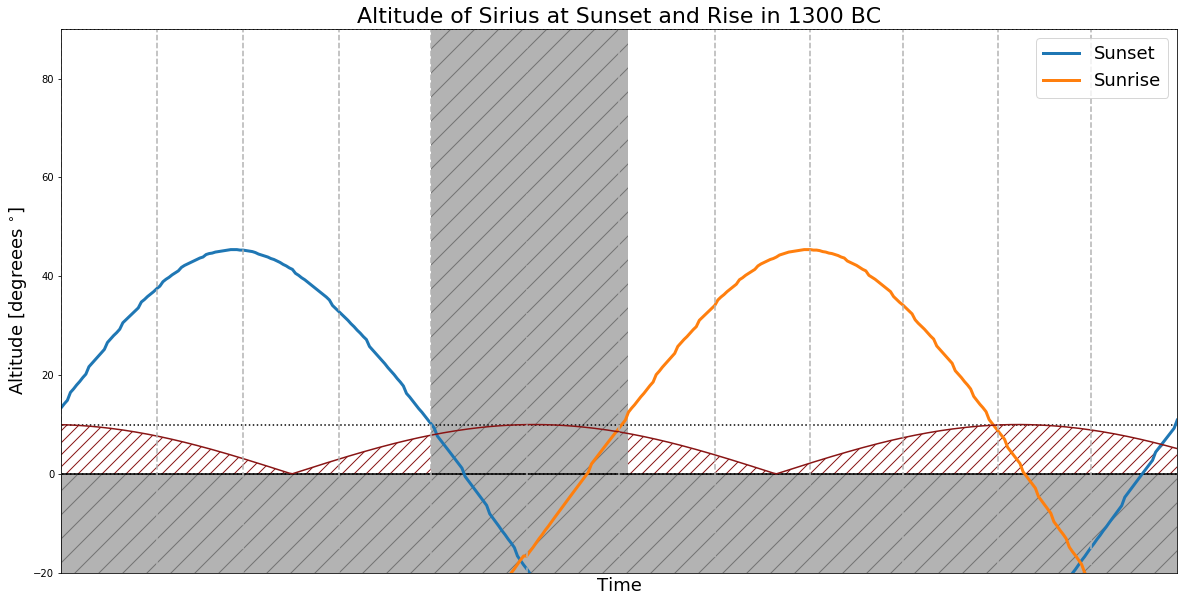

In [16]:
plt.figure(figsize=(20,10))

plt.plot(xdays, SirSetAlt,  linewidth=3.0, label = 'Sunset')
plt.plot(xdays, SirRiseAlt,  linewidth=3.0, label = 'Sunrise')

# landscaping
plt.hlines(0, 0, 366)
plt.hlines(10, 0, 366, linestyle = ':')

xdays = np.arange(1, len(SirMaxAlt)+1)
y1 = np.abs(10 * np.sin(0.02 * xdays + 29.9))

# this makes the "mountain" effect
plt.plot(xdays, y1, color="#891515")
plt.fill_between(xdays, 0, y1,  facecolor="none", hatch="//", edgecolor="#891515", linewidth=0.0)
plt.fill_between(xdays, -30, 0, facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)


# NESW LINES
ycoords = np.cumsum([-360, 90, 90, 90, 90, 90, 90, 90])
for yc in ycoords:
    plt.hlines(yc, 0, 366, linestyle = ':')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )

plt.fill_between(xdays[120 : 130 + 54 + 1], -360, 360,  facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)    
    
    
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Altitude of Sirius at Sunset and Rise in 1300 BC', fontsize=22)    
plt.ylabel(r'Altitude [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(-20, 90)
plt.legend(fontsize = 18)
plt.show()